### Data Exploration on olympics data based on Gender

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from pylab import *

In [2]:
data = pd.read_table('data/olympics.csv', sep=',', header=0, engine='python')

In [3]:
data

,ID,Name,Sex,Age,Height,Weight,Country,NOC,Games,Year,Season,City,Sport,Event,Medal,Average Temperature,GDP Per Capita
0,47772,Leszek Hensler,M,24.0,172.0,70.0,Poland,POL,1980 Summer,1980,Summer,Moskva,Hockey,Hockey Men's Hockey,0.0,7.85,17091.859905
1,130262,Stanisaw Wierzbicki,M,21.0,189.0,87.0,Poland,POL,1980 Summer,1980,Summer,Moskva,Rowing,Rowing Men's Quadruple Sculls,0.0,7.85,17091.859905
2,130265,Jacek Maria Wierzchowiecki,M,36.0,170.0,68.0,Poland,POL,1980 Summer,1980,Summer,Moskva,Equestrianism,"Equestrianism Mixed Three-Day Event, Individual",0.0,7.85,17091.859905
3,7658,Barbara Bronisawa Baran-Wojnar,F,20.0,168.0,55.0,Poland,POL,1980 Summer,1980,Summer,Moskva,Athletics,Athletics Women's Long Jump,0.0,7.85,17091.859905
4,114578,Wadysaw Stecyk,M,29.0,156.0,52.0,Poland,POL,1980 Summer,1980,Summer,Moskva,Wrestling,"Wrestling Men's Flyweight, Freestyle",2.0,7.85,17091.859905
5,130265,Jacek Maria Wierzchowiecki,M,36.0,170.0,68.0,Poland,POL,1980 Summer,1980,Summer,Moskva,Equestrianism,"Equestrianism Mixed Three-Day Event, Team",0.0,7.85,17091.859905
6,58306,Alfred Jzef Kauziski,M,27.0,190.0,81.0,Poland,POL,1980 Summer,1980,Summer,Moskva,Handball,Handball Men's Handball,0.0,7.85,17091.859905
7,58225,Stanisaw Hubert Kawulok,M,26.0,171.0,68.0,Poland,POL,1980 Winter,1980,Winter,Lake Placid,Nordic Combined,Nordic Combined Men's Individual,0.0,7.85,17091.859905
8,41918,Leszek Jan Grski,M,18.0,184.0,85.0,Poland,POL,1980 Summer,1980,Summer,Moskva,Swimming,Swimming Men's 400 metres Individual Medley,0.0,7.85,17091.859905
9,41941,Zygmunt Gosiewski,M,20.0,182.0,71.0,Poland,POL,1980 Summer,1980,Summer,Moskva,Boxing,Boxing Men's Light-Middleweight,0.0,7.85,17091.859905


In [4]:
data = data.replace({'Sex' : { 'F' : 0, 'M' : 1}})
data = data.replace({'Season' : { 'Summer' : 0, 'Winter' : 1}})
temp = data.pop('Medal')
data['Medal']=temp
sports = data['Sport'].unique()
sport_label = dict(zip(sports, range(len(sports))))
data['Sport'] = [sport_label[s] for s in data['Sport']]

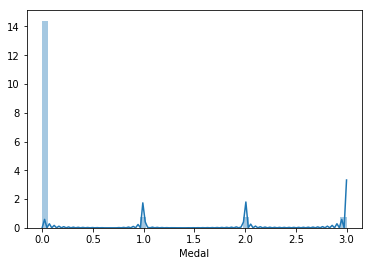

In [5]:
sns.distplot(data['Medal']);

In [6]:
data['Medal'].describe()

count    130324.000000
mean          0.275122
std           0.756366
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           3.000000
Name: Medal, dtype: float64

In [7]:
data['Sex'].describe()

count    130324.000000
mean          0.623753
std           0.484445
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: Sex, dtype: float64

In [8]:
data['Sport'].describe()

count    130324.000000
mean         15.485789
std          11.793682
min           0.000000
25%           5.000000
50%          13.000000
75%          24.000000
max          50.000000
Name: Sport, dtype: float64

In [9]:
gold_medal = data.loc[data['Medal'] == 1.0]
gold_medal

,ID,Name,Sex,Age,Height,Weight,Country,NOC,Games,Year,Season,City,Sport,Event,Average Temperature,GDP Per Capita,Medal
185,63549,Wadysaw Kozakiewicz,1,26.0,187.0,82.0,Poland,POL,1980 Summer,1980,0,Moskva,3,Athletics Men's Pole Vault,7.85,17091.859905,1.0
189,63506,Jan Kowalczyk,1,38.0,169.0,68.0,Poland,POL,1980 Summer,1980,0,Moskva,2,"Equestrianism Mixed Jumping, Individual",7.85,17091.859905,1.0
390,74084,Bronisaw Malinowski,1,29.0,182.0,68.0,Poland,POL,1980 Summer,1980,0,Moskva,3,"Athletics Men's 3,000 metres Steeplechase",7.85,17091.859905,1.0
658,68321,Waldemar Legie,1,25.0,180.0,85.0,Poland,POL,1988 Summer,1988,0,Seoul,23,Judo Men's Half-Middleweight,7.85,17091.859905,1.0
663,131756,Andrzej Wroski,1,23.0,192.0,97.0,Poland,POL,1988 Summer,1988,0,Seoul,4,"Wrestling Men's Heavyweight, Greco-Roman",7.85,17091.859905,1.0
775,68321,Waldemar Legie,1,28.0,180.0,85.0,Poland,POL,1992 Summer,1992,0,Barcelona,23,Judo Men's Middleweight,7.85,17091.859905,1.0
899,42146,Dariusz Godziak,1,29.0,174.0,75.0,Poland,POL,1992 Summer,1992,0,Barcelona,12,Modern Pentathlon Men's Team,7.85,17091.859905,1.0
944,111820,Arkadiusz Skrzypaszek,1,24.0,185.0,78.0,Poland,POL,1992 Summer,1992,0,Barcelona,12,Modern Pentathlon Men's Team,7.85,17091.859905,1.0
945,111820,Arkadiusz Skrzypaszek,1,24.0,185.0,78.0,Poland,POL,1992 Summer,1992,0,Barcelona,12,Modern Pentathlon Men's Individual,7.85,17091.859905,1.0
1003,24580,Maciej Tomasz Czyowicz,1,30.0,176.0,72.0,Poland,POL,1992 Summer,1992,0,Barcelona,12,Modern Pentathlon Men's Team,7.85,17091.859905,1.0


In [10]:
test = data.groupby(['Sex'])
test.describe()

Age                                                     \
       count       mean       std   min   25%   50%   75%   max   
Sex                                                               
0    49034.0  24.375678  5.525487  12.0  21.0  24.0  28.0  63.0   
1    81290.0  25.787821  5.218342  12.0  22.0  25.0  28.0  71.0   

    Average Temperature              ...   Weight            Year  \
                  count       mean   ...      75%    max    count   
Sex                                  ...                            
0               49034.0  10.039293   ...     66.0  167.0  49034.0   
1               81290.0  11.100534   ...     85.0  198.0  81290.0   

                                                                     
            mean        std     min     25%     50%     75%     max  
Sex                                                                  
0    2002.527226   9.828462  1980.0  1996.0  2004.0  2012.0  2016.0  
1    1999.636265  10.627843  1980.0  1992.0  2000.0  2008.0  2016.0  

[2 rows x 80 columns]

In [11]:
data_year = data.groupby(['Year','Sex'])
data_year.describe()

Age                                                     \
           count       mean       std   min   25%   50%   75%   max   
Year Sex                                                              
1980 0    1310.0  20.913740  5.334298  13.0  17.0  20.0  24.0  49.0   
     1    4455.0  24.605163  5.023843  13.0  21.0  24.0  27.0  59.0   
1984 0    2230.0  21.877130  5.224023  13.0  18.0  21.0  25.0  52.0   
     1    6372.0  24.545355  5.103633  12.0  21.0  24.0  27.0  60.0   
1988 0    2868.0  22.337866  5.526093  13.0  18.0  22.0  25.0  63.0   
     1    7245.0  24.783299  4.962362  13.0  21.0  24.0  27.0  70.0   
1992 0    3425.0  23.265693  5.170296  12.0  20.0  23.0  26.0  53.0   
     1    7454.0  25.188087  4.951777  14.0  22.0  24.0  28.0  58.0   
1994 0     992.0  23.669355  4.217539  13.0  21.0  23.0  27.0  38.0   
     1    1749.0  24.720983  3.976896  15.0  22.0  24.0  27.0  46.0   
1996 0    3920.0  23.739286  5.744175  12.0  19.0  23.0  27.0  58.0   
     1    7052.0  25.671441  5.168851  14.0  22.0  25.0  28.0  63.0   
1998 0    1316.0  24.430851  4.335082  15.0  21.0  24.0  27.0  42.0   
     1    1960.0  25.475510  4.323141  14.0  22.0  25.0  28.0  50.0   
2000 0    4967.0  24.518623  5.648234  13.0  20.0  24.0  28.0  53.0   
     1    7717.0  26.004017  5.142007  14.0  22.0  25.0  29.0  57.0   
2002 0    1485.0  25.152189  4.469544  15.0  22.0  25.0  28.0  48.0   
     1    2303.0  26.280938  4.683800  15.0  23.0  26.0  29.0  48.0   
2004 0    5119.0  24.767533  5.802523  13.0  21.0  24.0  28.0  56.0   
     1    7290.0  26.244993  5.335479  14.0  23.0  25.0  29.0  57.0   
2006 0    1668.0  25.178657  4.726266  14.0  22.0  25.0  28.0  44.0   
     1    2412.0  26.381426  4.911877  15.0  23.0  26.0  29.0  52.0   
2008 0    5324.0  24.856687  5.695374  12.0  21.0  24.0  28.0  58.0   
     1    7196.0  26.410089  5.477464  14.0  23.0  25.0  29.0  67.0   
2010 0    1754.0  25.294755  4.807095  15.0  22.0  25.0  28.0  46.0   
     1    2339.0  26.640872  5.003520  15.0  23.0  26.0  30.0  51.0   
2012 0    5128.0  25.262285  5.557688  13.0  21.0  25.0  28.0  57.0   
     1    6343.0  26.709601  5.732075  15.0  23.0  26.0  29.0  71.0   
2014 0    1845.0  25.462331  4.638717  15.0  22.0  25.0  28.0  45.0   
     1    2541.0  26.454939  4.958096  15.0  23.0  26.0  30.0  55.0   
2016 0    5683.0  25.597396  5.490269  13.0  22.0  25.0  29.0  62.0   
     1    6862.0  26.756776  5.492413  14.0  23.0  26.0  30.0  60.0   

         Average Temperature             ...   Sport        Weight             \
                       count       mean  ...     75%   max   count       mean   
Year Sex                                 ...                                    
1980 0                1310.0  11.188092  ...    16.0  33.0  1310.0  57.429389   
     1                4455.0  12.813524  ...    18.0  43.0  4455.0  73.871942   
1984 0                2230.0   9.666121  ...    17.0  44.0  2230.0  57.750448   
     1                6372.0  12.184534  ...    18.0  43.0  6372.0  74.238308   
1988 0                2868.0  10.171025  ...    18.0  44.0  2868.0  58.041318   
     1                7245.0  12.014624  ...    18.0  43.0  7245.0  74.544928   
1992 0                3425.0   9.592832  ...    25.0  44.0  3425.0  59.307883   
     1                7454.0  11.092675  ...    21.0  45.0  7454.0  75.928159   
1994 0                 992.0   6.298841  ...    32.0  41.0   992.0  59.536794   
     1                1749.0   6.474957  ...    27.0  41.0  1749.0  76.342481   
1996 0                3920.0  10.012895  ...    17.0  46.0  3920.0  59.297959   
     1                7052.0  11.687436  ...    17.0  45.0  7052.0  77.176546   
1998 0                1316.0   6.249354  ...    32.0  48.0  1316.0  60.014818   
     1                1960.0   6.607551  ...    32.0  48.0  1960.0  76.900765   
2000 0                4967.0  11.058093  ...    20.0  47.0  4967.0  60.831890   
     1                7717.0  11.959110  ...    18.0  47.0  7717.0  7

In [12]:
# Grouping female data from the dataset
female = data[(data['Sex']==0.0)]
female_grouped = female.groupby('Year')['Sex'].count()
df_female = pd.DataFrame({'Year':female_grouped.index, 'female_count':female_grouped.values})
df_female

,Year,female_count
0,1980,1310
1,1984,2230
2,1988,2868
3,1992,3425
4,1994,992
5,1996,3920
6,1998,1316
7,2000,4967
8,2002,1485
9,2004,5119


In [13]:
# Grouping male data
male = data[(data['Sex']==1.0)]
male_grouped = male.groupby('Year')['Sex'].count()
df_male = pd.DataFrame({'Year':male_grouped.index, 'male_count':male_grouped.values})
df_male

,Year,male_count
0,1980,4455
1,1984,6372
2,1988,7245
3,1992,7454
4,1994,1749
5,1996,7052
6,1998,1960
7,2000,7717
8,2002,2303
9,2004,7290


In [14]:
# Grouping data on year and sex
data.groupby('Year')['Sex'].count()

Year
1980     5765
1984     8602
1988    10113
1992    10879
1994     2741
1996    10972
1998     3276
2000    12684
2002     3788
2004    12409
2006     4080
2008    12520
2010     4093
2012    11471
2014     4386
2016    12545
Name: Sex, dtype: int64

In [15]:
# Joining male and female data
gender_peryear = pd.merge(df_male, df_female, how='inner', on=['Year'])
gender_peryear.head()

,Year,male_count,female_count
0,1980,4455,1310
1,1984,6372,2230
2,1988,7245,2868
3,1992,7454,3425
4,1994,1749,992


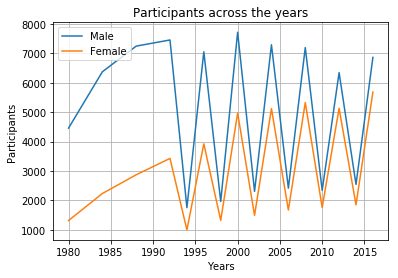

In [16]:
# Plotting data across years for both male and female
plt.xlabel('Years')
plt.ylabel('Participants')
plt.title('Participants across the years')
plt.grid(True)
plt.plot(gender_peryear['Year'], gender_peryear['male_count'])
plt.plot(gender_peryear['Year'], gender_peryear['female_count'])
plt.legend(('Male','Female'))
plt.savefig('graphs/participantsAcrossYears.png')
show()

In [17]:
# COntinuing to collect similar data only for winners
data_winners = data[(data['Medal']!=0.0)]
male_winners = data_winners[(data_winners['Sex']==1.0)]
male_winners_grouped = male_winners.groupby('Year')['Sex'].count()
df_male_winners = pd.DataFrame({'Year':male_winners_grouped.index, 'male_winners_count':male_winners_grouped.values})
df_male_winners

,Year,male_winners_count
0,1980,486
1,1984,798
2,1988,615
3,1992,966
4,1994,189
5,1996,965
6,1998,220
7,2000,1029
8,2002,240
9,2004,1033


In [18]:
male_winners_grouped.head()

Year
1980    486
1984    798
1988    615
1992    966
1994    189
Name: Sex, dtype: int64

In [19]:
data_winners = data[(data['Medal']!=0.0)]
female_winners = data_winners[(data_winners['Sex']==0.0)]
female_winners_grouped = female_winners.groupby('Year')['Sex'].count()
df_female_winners = pd.DataFrame({'Year':female_winners_grouped.index, 'female_winners_count':female_winners_grouped.values})
df_female_winners

,Year,female_winners_count
0,1980,136
1,1984,431
2,1988,356
3,1992,476
4,1994,99
5,1996,665
6,1998,181
7,2000,839
8,2002,189
9,2004,848


In [20]:
data_winners.head(5)

,ID,Name,Sex,Age,Height,Weight,Country,NOC,Games,Year,Season,City,Sport,Event,Average Temperature,GDP Per Capita,Medal
4,114578,Wadysaw Stecyk,1,29.0,156.0,52.0,Poland,POL,1980 Summer,1980,0,Moskva,4,"Wrestling Men's Flyweight, Freestyle",7.85,17091.859905,2.0
12,27440,Tadeusz Demboczyk,1,24.0,155.0,56.0,Poland,POL,1980 Summer,1980,0,Moskva,9,Weightlifting Men's Bantamweight,7.85,17091.859905,3.0
20,114876,Grzegorz Jzef Stellak,1,29.0,197.0,95.0,Poland,POL,1980 Summer,1980,0,Moskva,1,Rowing Men's Coxed Fours,7.85,17091.859905,3.0
34,101229,Adam Ryszard Robak,1,23.0,183.0,73.0,Poland,POL,1980 Summer,1980,0,Moskva,16,"Fencing Men's Foil, Team",7.85,17091.859905,3.0
53,66456,Lucyna Langer (-Kaek),0,24.0,167.0,55.0,Poland,POL,1980 Summer,1980,0,Moskva,3,Athletics Women's 100 metres Hurdles,7.85,17091.859905,3.0


In [21]:
gender_winners_peryear = pd.merge(df_male_winners, df_female_winners, how='inner', on=['Year'])
gender_winners_peryear.head()

,Year,male_winners_count,female_winners_count
0,1980,486,136
1,1984,798,431
2,1988,615,356
3,1992,966,476
4,1994,189,99


In [22]:
records = pd.merge(gender_winners_peryear, gender_peryear, how='inner', on=['Year'])
records.head()

,Year,male_winners_count,female_winners_count,male_count,female_count
0,1980,486,136,4455,1310
1,1984,798,431,6372,2230
2,1988,615,356,7245,2868
3,1992,966,476,7454,3425
4,1994,189,99,1749,992


In [23]:
records['male_count_normalized'] = records.apply(lambda row : row['male_winners_count']/row['male_count'] ,axis=1)

In [24]:
records.head()

,Year,male_winners_count,female_winners_count,male_count,female_count,male_count_normalized
0,1980,486,136,4455,1310,0.109091
1,1984,798,431,6372,2230,0.125235
2,1988,615,356,7245,2868,0.084886
3,1992,966,476,7454,3425,0.129595
4,1994,189,99,1749,992,0.108062


In [25]:
records['female_count_normalized'] = records.apply(lambda row : row['female_winners_count']/row['female_count'] ,axis=1)
records.head()

,Year,male_winners_count,female_winners_count,male_count,female_count,male_count_normalized,female_count_normalized
0,1980,486,136,4455,1310,0.109091,0.103817
1,1984,798,431,6372,2230,0.125235,0.193274
2,1988,615,356,7245,2868,0.084886,0.124128
3,1992,966,476,7454,3425,0.129595,0.138978
4,1994,189,99,1749,992,0.108062,0.099798


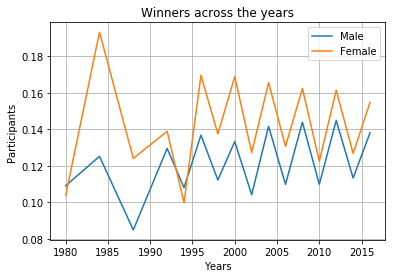

In [26]:
# Plotting graphs for winners across the years. 
plt.xlabel('Years')
plt.ylabel('Participants')
plt.title('Winners across the years')
plt.grid(True)
plt.plot(records['Year'], records['male_count_normalized'])
plt.plot(records['Year'], records['female_count_normalized']) 
plt.legend(('Male','Female'))
plt.savefig('graphs/winnerAcrossYearsGender.png')
plt.show()

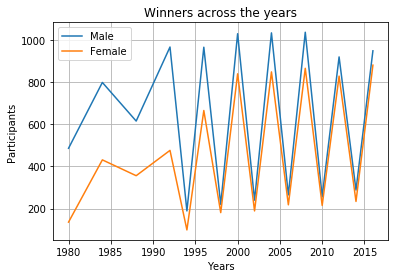

In [27]:
# Winner's data after normalizing data
plt.xlabel('Years')
plt.ylabel('Participants')
plt.title('Winners across the years')
plt.grid(True)
plt.plot(records['Year'], records['male_winners_count'])
plt.plot(records['Year'], records['female_winners_count'])
plt.legend(('Male','Female'))
plt.savefig('graphs/participantsAcrossYearsGender2.png')
show()

In [28]:
male_1980 = data[(data['Sex']==1.0)&(data['Year']==1980)]
male_1980_grouped = male_1980.groupby('Country')['Sex'].count()
df_male_1980 = pd.DataFrame({'Country':male_1980_grouped.index, 'male_count':male_1980_grouped.values})
df_male_1980.head(10)

,Country,male_count
0,Afghanistan,11
1,Algeria,57
2,Andorra,5
3,Angola,15
4,Argentina,4
5,Australia,137
6,Austria,103
7,Belgium,57
8,Benin,7
9,Bolivia,3


In [29]:
female_1980 = data[(data['Sex']==0.0)&(data['Year']==1980)]
female_1980_grouped = female_1980.groupby('Country')['Sex'].count()
df_female_1980 = pd.DataFrame({'Country':female_1980_grouped.index, 'female_count':female_1980_grouped.values})
df_female_1980.head(10)

,Country,female_count
0,Angola,2
1,Australia,59
2,Austria,36
3,Belgium,30
4,Brazil,19
5,Bulgaria,136
6,Cameroon,1
7,Canada,25
8,China,6
9,Costa Rica,4


In [30]:
gender_participants_across_countries = pd.merge(df_male_1980, df_female_1980, how='inner', on=['Country'])
gender_participants_across_countries.head(10)

,Country,male_count,female_count
0,Angola,15,2
1,Australia,137,59
2,Austria,103,36
3,Belgium,57,30
4,Brazil,129,19
5,Bulgaria,265,136
6,Cameroon,22,1
7,Canada,31,25
8,China,4,6
9,Costa Rica,30,4


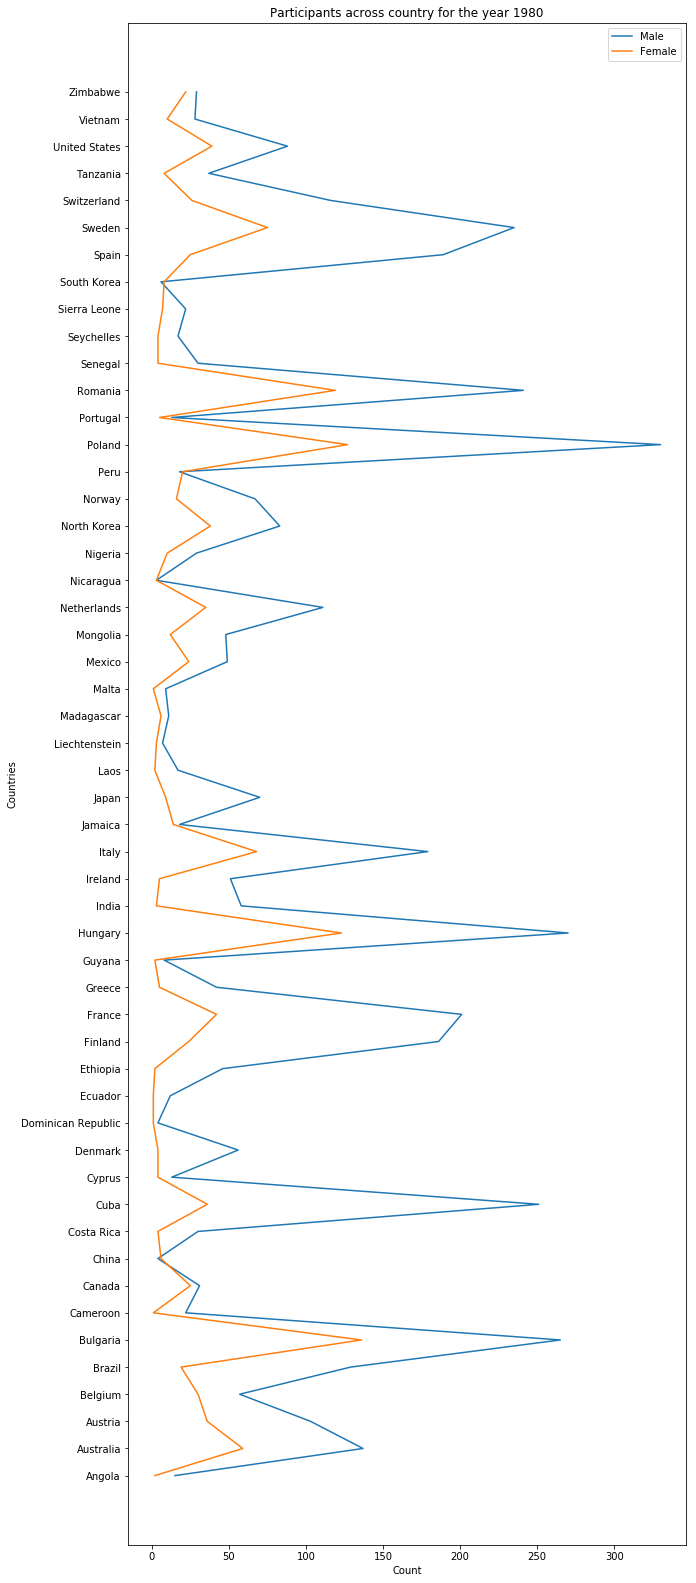

In [31]:
# Plotting graphs for male and female participants across all participating 
# countries for the year 1980
plt.figure(figsize=(10,28))
plt.title('Participants across country for the year 1980')
plt.xlabel('Count')
plt.ylabel('Countries')
plt.plot(gender_participants_across_countries['male_count'], gender_participants_across_countries['Country'])
plt.plot(gender_participants_across_countries['female_count'], gender_participants_across_countries['Country'])
plt.legend(('Male','Female'))
plt.savefig('graphs/participantsAcrossYearsCountries1980.png')
plt.show()

In [32]:
male_2016 = data[(data['Sex']==1.0)&(data['Year']==2016)]
male_2016_grouped = male_2016.groupby('Country')['Sex'].count()
df_male_2016 = pd.DataFrame({'Country':male_2016_grouped.index, 'male_count':male_2016_grouped.values})
df_male_2016.head(10)

,Country,male_count
0,Afghanistan,2
1,Albania,3
2,Algeria,61
3,Andorra,2
4,Angola,8
5,Antigua and Barbuda,6
6,Argentina,146
7,Armenia,24
8,Australia,253
9,Austria,41


In [33]:
female_2016 = data[(data['Sex']==0.0)&(data['Year']==2016)]
female_2016_grouped = female_2016.groupby('Country')['Sex'].count()
df_female_2016 = pd.DataFrame({'Country':female_2016_grouped.index, 'female_count':female_2016_grouped.values})
df_female_2016.head(10)

,Country,female_count
0,Afghanistan,1
1,Albania,3
2,Algeria,13
3,Andorra,2
4,Angola,18
5,Antigua and Barbuda,2
6,Argentina,82
7,Armenia,10
8,Australia,251
9,Austria,40


In [34]:
gender_participants_across_countries = pd.merge(df_male_2016, df_female_2016, how='inner', on=['Country'])
gender_participants_across_countries.head(10)

,Country,male_count,female_count
0,Afghanistan,2,1
1,Albania,3,3
2,Algeria,61,13
3,Andorra,2,2
4,Angola,8,18
5,Antigua and Barbuda,6,2
6,Argentina,146,82
7,Armenia,24,10
8,Australia,253,251
9,Austria,41,40


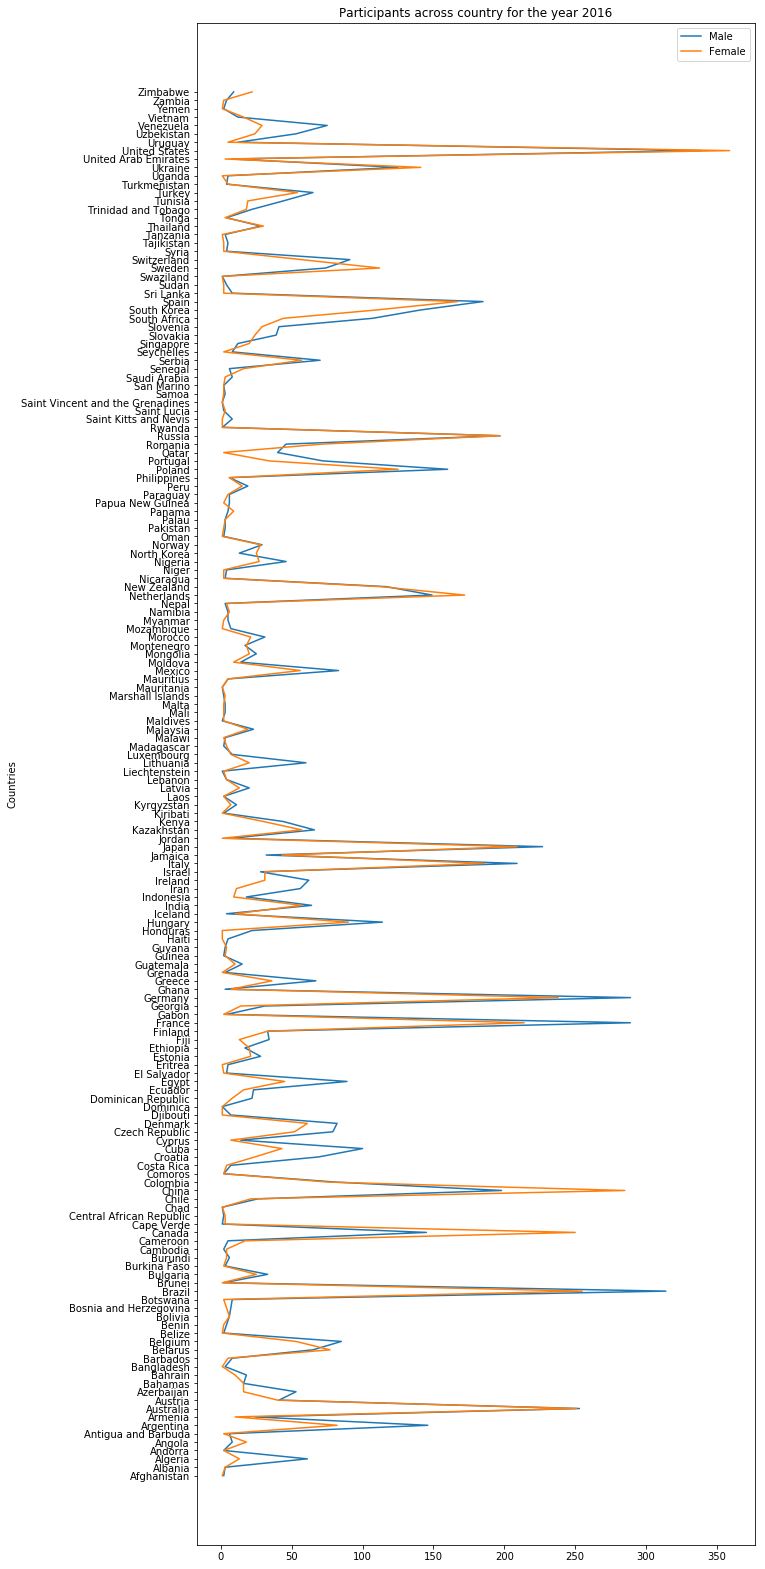

In [35]:
# Plotting graphs for male and female participants across all participating 
# countries for the year 2016
plt.figure(figsize=(10,28))
plt.title('Participants across country for the year 2016')
plt.xlabel('Count')
plt.ylabel('Countries')
plt.plot(gender_participants_across_countries['male_count'], gender_participants_across_countries['Country'])
plt.plot(gender_participants_across_countries['female_count'], gender_participants_across_countries['Country'])
plt.legend(('Male','Female'))
plt.xlabel('')
plt.savefig('graphs/participants_countries2016.png')
plt.show()

In [36]:
female_winners_1980 = data[(data['Sex']==0.0)&(data['Year']==1980)&(data['Medal']!=0.0)]
female_1980_winners_grouped = female_winners_1980.groupby('Country')['Sex'].count()
df_female_winners_1980 = pd.DataFrame({'Country':female_1980_winners_grouped.index, 'female_count':female_1980_winners_grouped.values})
df_female_1980.head(10)

,Country,female_count
0,Angola,2
1,Australia,59
2,Austria,36
3,Belgium,30
4,Brazil,19
5,Bulgaria,136
6,Cameroon,1
7,Canada,25
8,China,6
9,Costa Rica,4


In [37]:
male_winners_1980 = data[(data['Sex']==1.0)&(data['Year']==1980)&(data['Medal']!=0.0)]
male_1980_winners_grouped = male_winners_1980.groupby('Country')['Sex'].count()
df_male_winners_1980 = pd.DataFrame({'Country':male_1980_winners_grouped.index, 'male_count':male_1980_winners_grouped.values})
df_male_winners_1980.head(10)

,Country,male_count
0,Australia,11
1,Austria,9
2,Belgium,1
3,Brazil,9
4,Bulgaria,54
5,Canada,1
6,Cuba,19
7,Denmark,7
8,Ethiopia,4
9,Finland,17


In [38]:
gender_winners_across_countries_1980 = pd.merge(df_male_winners_1980, df_female_winners_1980, how='inner', on=['Country'])
gender_winners_across_countries_1980.head(10)

,Country,male_count,female_count
0,Australia,11,2
1,Austria,9,2
2,Bulgaria,54,36
3,Cuba,19,1
4,Denmark,7,1
5,Finland,17,4
6,France,23,7
7,Hungary,54,9
8,Italy,35,3
9,Jamaica,2,1


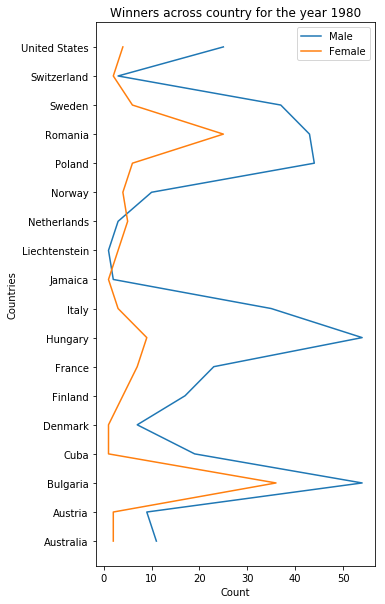

In [39]:
# Plotting graphs for male and female winners across all participating 
# countries for the year 1980
plt.figure(figsize=(5,10))
plt.title('Winners across country for the year 1980')
plt.xlabel('Count')
plt.ylabel('Countries')
plt.plot(gender_winners_across_countries_1980['male_count'], gender_winners_across_countries_1980['Country'])
plt.plot(gender_winners_across_countries_1980['female_count'], gender_winners_across_countries_1980['Country'])
plt.legend(('Male','Female'))
plt.savefig('graphs/winners_countries1980.png')
plt.show()

In [40]:
female_winners_2016 = data[(data['Sex']==0.0)&(data['Year']==2016)&(data['Medal']!=0.0)]
female_2016_winners_grouped = female_winners_2016.groupby('Country')['Sex'].count()
df_female_winners_2016 = pd.DataFrame({'Country':female_2016_winners_grouped.index, 'female_count':female_2016_winners_grouped.values})
df_female_2016.head(10)

,Country,female_count
0,Afghanistan,1
1,Albania,3
2,Algeria,13
3,Andorra,2
4,Angola,18
5,Antigua and Barbuda,2
6,Argentina,82
7,Armenia,10
8,Australia,251
9,Austria,40


In [41]:
male_winners_2016 = data[(data['Sex']==1.0)&(data['Year']==2016)&(data['Medal']!=0.0)]
male_2016_winners_grouped = male_winners_2016.groupby('Country')['Sex'].count()
df_male_winners_2016 = pd.DataFrame({'Country':male_2016_winners_grouped.index, 'male_count':male_2016_winners_grouped.values})
df_male_winners_2016.head(10)

,Country,male_count
0,Algeria,2
1,Argentina,20
2,Armenia,4
3,Australia,43
4,Austria,1
5,Azerbaijan,14
6,Bahamas,5
7,Belarus,5
8,Belgium,19
9,Brazil,41


In [42]:
gender_winners_across_countries_2016 = pd.merge(df_male_winners_2016, df_female_winners_2016, how='inner', on=['Country'])
gender_winners_across_countries_2016.head(10)

,Country,male_count,female_count
0,Argentina,20,2
1,Australia,43,39
2,Austria,1,1
3,Azerbaijan,14,4
4,Bahamas,5,1
5,Belarus,5,7
6,Belgium,19,2
7,Brazil,41,5
8,Canada,10,59
9,China,35,74


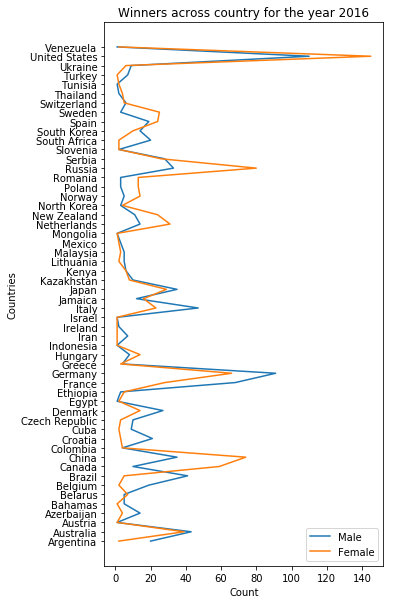

In [43]:
# Plotting graphs for male and female winners across all participating 
# countries for the year 2016
plt.figure(figsize=(5,10))
plt.title('Winners across country for the year 2016')
plt.xlabel('Count')
plt.ylabel('Countries')
plt.plot(gender_winners_across_countries_2016['male_count'], gender_winners_across_countries_2016['Country'])
plt.plot(gender_winners_across_countries_2016['female_count'], gender_winners_across_countries_2016['Country'])
plt.legend(('Male','Female'))
plt.savefig('graphs/winners_countries2016.png')
plt.show()